# a. Import the datasets


In [16]:
import pandas as pd

# Replace the placeholders below with the correct paths to your CSV files
sales_df = pd.read_csv('drive/MyDrive/ColabNotebooks/AIML-Capstone/Datasets/Capstone 3/sales.csv')
items_df = pd.read_csv('drive/MyDrive/ColabNotebooks/AIML-Capstone/Datasets/Capstone 3/items.csv')
stores_df = pd.read_csv('drive/MyDrive/ColabNotebooks/AIML-Capstone/Datasets/Capstone 3/resturants.csv')

# Display the first few rows of each DataFrame to verify
display(sales_df.head())
display(items_df.head())
display(stores_df.head())

,date,item_id,price,item_count
0,2019-01-01,3,29.22,2.0
1,2019-01-01,4,26.42,22.0
2,2019-01-01,12,4.87,7.0
3,2019-01-01,13,4.18,12.0
4,2019-01-01,16,3.21,136.0


,id,store_id,name,kcal,cost
0,1,4,Chocolate Cake,554,6.71
1,2,4,Breaded Fish with Vegetables Meal,772,15.09
2,3,1,Sweet Fruity Cake,931,29.22
3,4,1,Amazing Steak Dinner with Rolls,763,26.42
4,5,5,Milk Cake,583,6.07


,id,name
0,1,Bob's Diner
1,2,Beachfront Bar
2,3,Sweet Shack
3,4,Fou Cher
4,5,Corner Cafe


In [4]:
# Check the shape of each dataset
print(sales_df.shape)
print(items_df.shape)
print(stores_df.shape)
print("------------------------------")

# Check for nulls and data types
print(sales_df.isnull().sum())
print("------------------------------")
print(items_df.isnull().sum())
print("------------------------------")
print(stores_df.isnull().sum())
print("------------------------------")

# Basic summary stats
print(sales_df.describe())


(109600, 4)
(100, 5)
(6, 2)
------------------------------
date          0
item_id       0
price         0
item_count    0
dtype: int64
------------------------------
id          0
store_id    0
name        0
kcal        0
cost        0
dtype: int64
------------------------------
id      0
name    0
dtype: int64
------------------------------
             item_id          price     item_count
count  109600.000000  109600.000000  109600.000000
mean       50.500000      11.763700       6.339297
std        28.866202       8.946225      30.003728
min         1.000000       1.390000       0.000000
25%        25.750000       5.280000       0.000000
50%        50.500000       7.625000       0.000000
75%        75.250000      18.790000       0.000000
max       100.000000      53.980000     570.000000


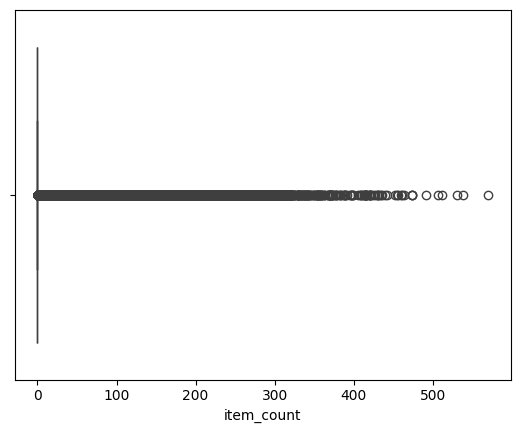

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=sales_df['item_count'])
plt.show()

# Observations
## Most values fall between 0 and ~100.
## However, there are several points to the right (distant, isolated points).
## These are outliers, meaning values that are significantly higher than the average.

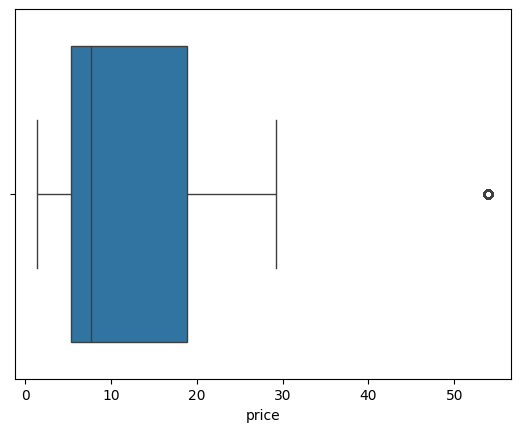

In [7]:


# Boxplot for item count or price to check outliers
sns.boxplot(x=sales_df['price'])
plt.show()

# Observations
## Most prices fall within the range of 0 to 30.
## However, there is one point on the right side (above 50).
## This point is considered an outlier.

In [17]:
# Merge sales with items
merged_df = pd.merge(sales_df, items_df, left_on='item_id', right_on='id', how='left')

# Merge the result with stores
merged_df = pd.merge(merged_df, stores_df, left_on='store_id', right_on='id', how='left')

# Confirm the structure
print(merged_df.head())

         date  item_id  price  item_count  id_x  store_id  \
0  2019-01-01        3  29.22         2.0     3         1   
1  2019-01-01        4  26.42        22.0     4         1   
2  2019-01-01       12   4.87         7.0    12         1   
3  2019-01-01       13   4.18        12.0    13         1   
4  2019-01-01       16   3.21       136.0    16         1   

                            name_x  kcal   cost  id_y       name_y  
0                Sweet Fruity Cake   931  29.22     1  Bob's Diner  
1  Amazing Steak Dinner with Rolls   763  26.42     1  Bob's Diner  
2             Fantastic Sweet Cola   478   4.87     1  Bob's Diner  
3          Sweet Frozen Soft Drink   490   4.18     1  Bob's Diner  
4             Frozen Milky Smoothy   284   3.21     1  Bob's Diner  


# Date-wise Sales Trend

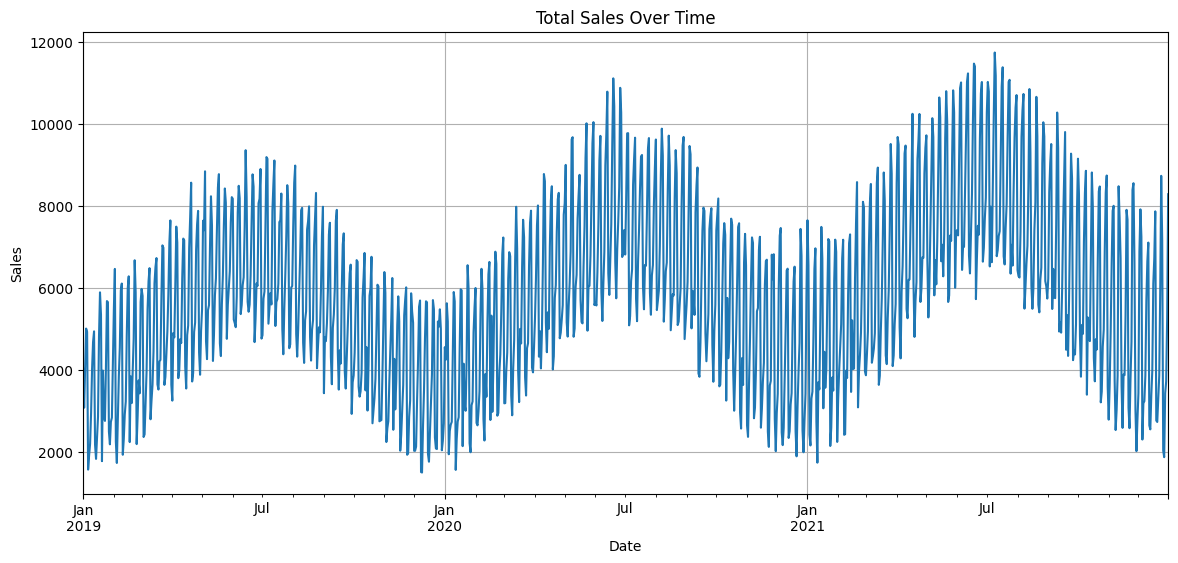

In [18]:
merged_df['date'] = pd.to_datetime(merged_df['date'])  # ensure date is datetime type

# Total sales per day (item_count * price)
merged_df['sales'] = merged_df['item_count'] * merged_df['price']

date_sales = merged_df.groupby('date')['sales'].sum()

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
date_sales.plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


# Sales by Day of the Week

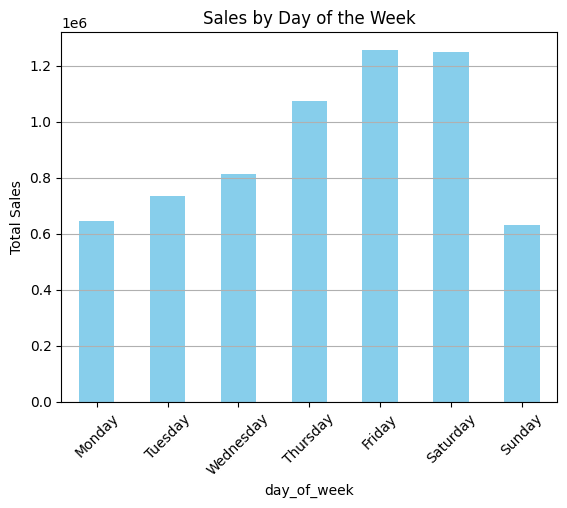

In [28]:
merged_df['day_of_week'] = merged_df['date'].dt.day_name()

weekly_sales = merged_df.groupby('day_of_week')['sales'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

weekly_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# Sales Trends by Month

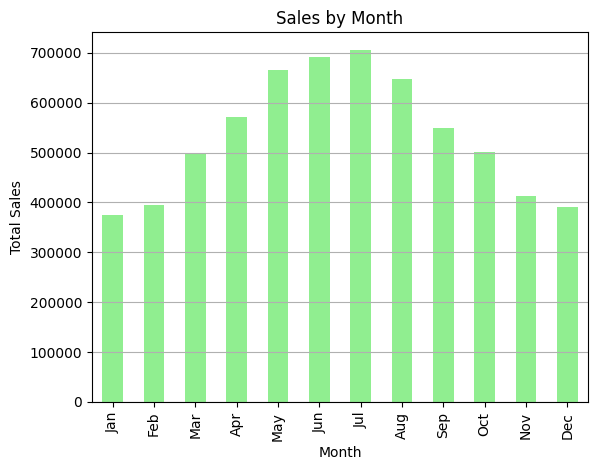

In [29]:
merged_df['month'] = merged_df['date'].dt.month

monthly_sales = merged_df.groupby('month')['sales'].sum()

monthly_sales.plot(kind='bar', color='lightgreen')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(0,12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()


# Sales by Quarter (Averaged Over Years)

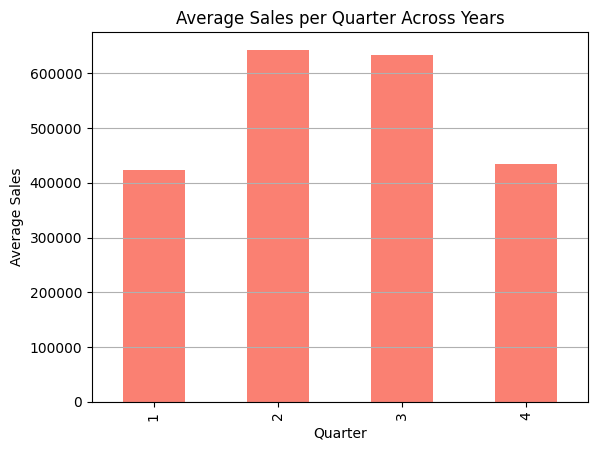

In [30]:
merged_df['year'] = merged_df['date'].dt.year
merged_df['quarter'] = merged_df['date'].dt.quarter

quarterly_sales = merged_df.groupby(['year', 'quarter'])['sales'].sum().reset_index()
avg_quarter_sales = quarterly_sales.groupby('quarter')['sales'].mean()

avg_quarter_sales.plot(kind='bar', color='salmon')
plt.title('Average Sales per Quarter Across Years')
plt.xlabel('Quarter')
plt.ylabel('Average Sales')
plt.grid(axis='y')
plt.show()


# Restaurant Performance
Which restaurant had the most total sales?

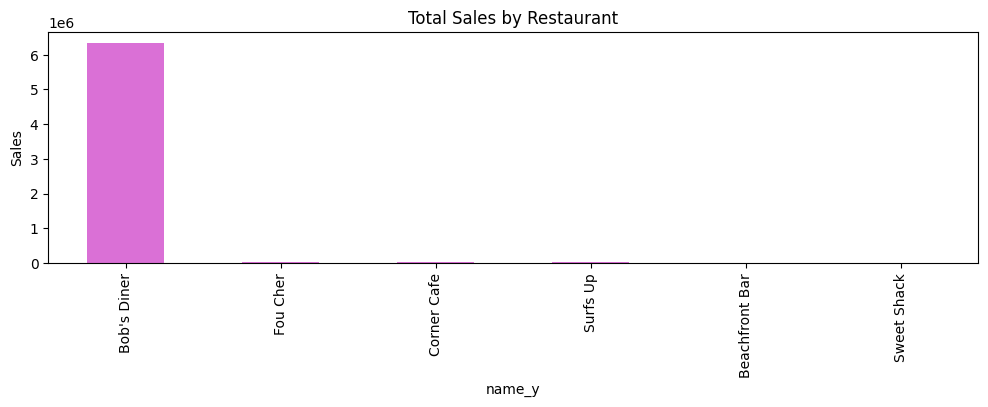

In [35]:
store_sales = merged_df.groupby('name_y')['sales'].sum().sort_values(ascending=False)

store_sales.plot(kind='bar', figsize=(12,3), color='orchid')
plt.title('Total Sales by Restaurant')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

# Sales by Year, Month, Day for each store:

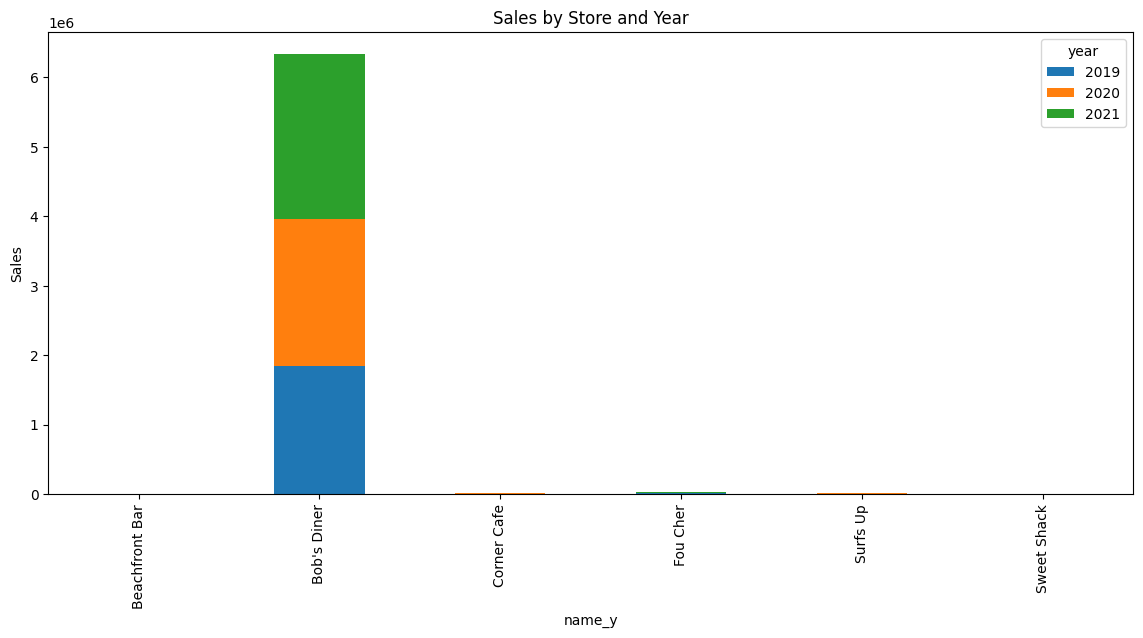

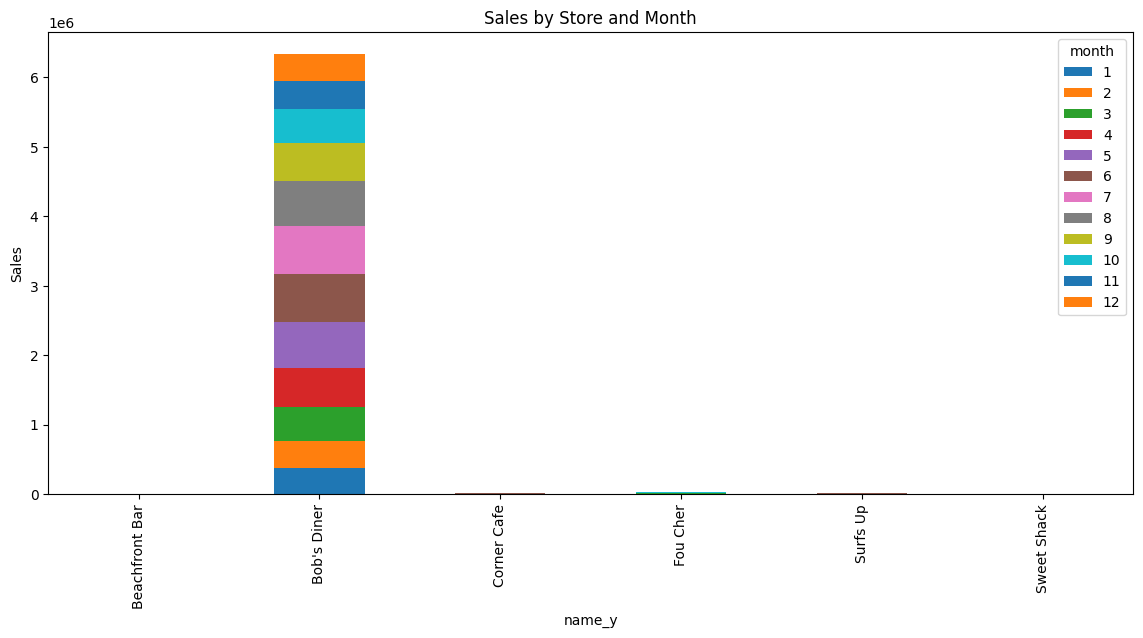

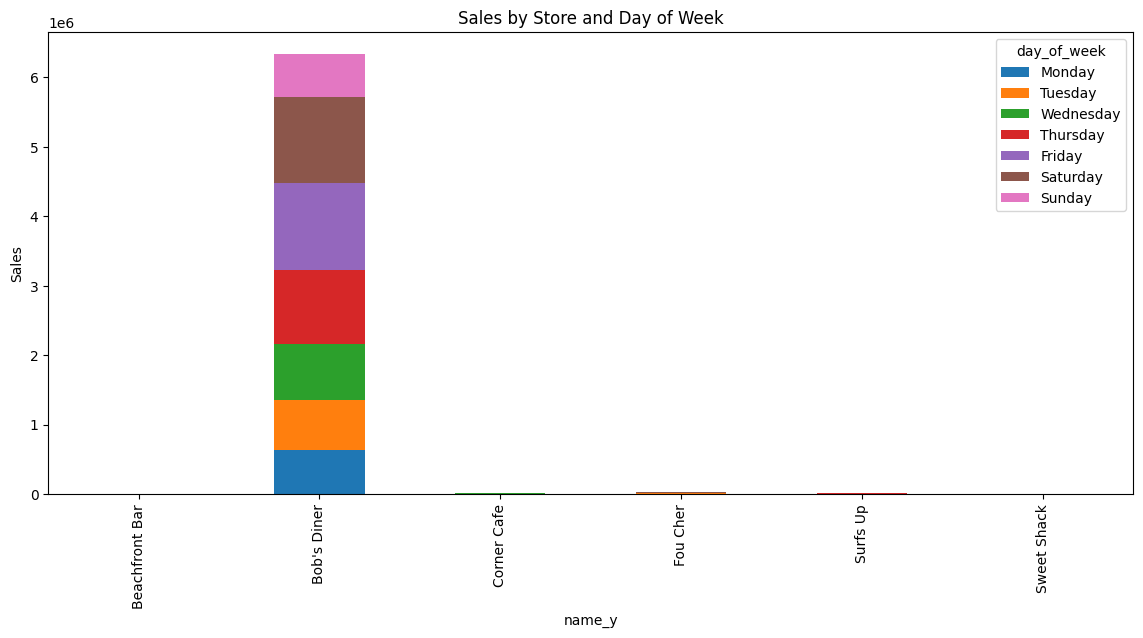

In [37]:
# Sales by Year
yearly_sales = merged_df.groupby(['name_y', 'year'])['sales'].sum().unstack()
yearly_sales.plot(kind='bar', stacked=True, figsize=(14,6))
plt.title('Sales by Store and Year')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

# Sales by Month
monthly_sales = merged_df.groupby(['name_y', 'month'])['sales'].sum().unstack()
monthly_sales.plot(kind='bar', stacked=True, figsize=(14,6))
plt.title('Sales by Store and Month')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

# Sales by Day of Week
dow_sales = merged_df.groupby(['name_y', 'day_of_week'])['sales'].sum().unstack()
dow_sales = dow_sales[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
dow_sales.plot(kind='bar', stacked=True, figsize=(14,6))
plt.title('Sales by Store and Day of Week')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

# Most popular items overall (by total quantity sold):

In [39]:
popular_items = merged_df.groupby('name_x')['item_count'].sum().sort_values(ascending=False)
print(popular_items.head(10))  # Top 10 best-sellers

name_x
Strawberry Smoothy                 236337.0
Frozen Milky Smoothy               103263.0
Amazing pork lunch                  61043.0
Mutton Dinner                       52772.0
Orange Juice                        43874.0
Blue Ribbon Beef Entree             42774.0
Amazing Steak Dinner with Rolls     34439.0
Sweet Frozen Soft Drink             27490.0
Sea Bass with Vegetables Dinner     23839.0
Sweet Lamb Cake                     18764.0
Name: item_count, dtype: float64


#  Which stores sell those popular items the most:

In [41]:
item_store_popularity = merged_df.groupby(['name_x', 'name_y'])['item_count'].sum().reset_index()
top_item_store = item_store_popularity.sort_values(by='item_count', ascending=False)
print(top_item_store.head(10))

                             name_x       name_y  item_count
91               Strawberry Smoothy  Bob's Diner    236337.0
47             Frozen Milky Smoothy  Bob's Diner    102990.0
9                Amazing pork lunch  Bob's Diner     61043.0
68                    Mutton Dinner  Bob's Diner     52772.0
71                     Orange Juice  Bob's Diner     43874.0
22          Blue Ribbon Beef Entree  Bob's Diner     42774.0
4   Amazing Steak Dinner with Rolls  Bob's Diner     34439.0
94          Sweet Frozen Soft Drink  Bob's Diner     27490.0
89  Sea Bass with Vegetables Dinner  Bob's Diner     23839.0
96                  Sweet Lamb Cake  Bob's Diner     18764.0


# Most popular item at each store:

In [43]:
most_popular_per_store = merged_df.groupby(['name_y', 'name_x'])['item_count'].sum().reset_index()
most_popular_per_store = most_popular_per_store.sort_values(['name_y', 'item_count'], ascending=[True, False])
top_items_by_store = most_popular_per_store.groupby('name_y').first().reset_index()
print(top_items_by_store)

           name_y                         name_x  item_count
0  Beachfront Bar        Fantastic Milky Smoothy      1147.0
1     Bob's Diner             Strawberry Smoothy    236337.0
2     Corner Cafe           Frozen Milky Smoothy       273.0
3        Fou Cher  Blue Ribbon Fruity Vegi Lunch       298.0
4        Surfs Up             Awesome Soft Drink       997.0
5     Sweet Shack                Awesome Smoothy      1692.0


# Store with highest total quantity sold:

In [45]:
top_volume_store = merged_df.groupby('name_y')['item_count'].sum().sort_values(ascending=False)
print("Top by volume:\n", top_volume_store.head(1))

Top by volume:
 name_y
Bob's Diner    687527.0
Name: item_count, dtype: float64


#  Store with highest revenue per day:

In [47]:
store_daily_sales = merged_df.groupby(['name_y', 'date'])['sales'].sum().reset_index()
avg_daily_sales = store_daily_sales.groupby('name_y')['sales'].mean().sort_values(ascending=False)
print("Top by average daily revenue:\n", avg_daily_sales.head(1))

Top by average daily revenue:
 name_y
Bob's Diner    5782.185849
Name: sales, dtype: float64


# Most Expensive Item at Each Restaurant + Its Calorie Count

In [49]:
# First, get the highest-priced item per store
max_price_items = merged_df.groupby(['name_y', 'name_x', 'kcal'])['price'].max().reset_index()

# Find the max price per store
max_prices = max_price_items.groupby('name_y')['price'].max().reset_index()

# Merge to get item names and kcal
most_expensive_items = pd.merge(max_prices, max_price_items, on=['name_y', 'price'], how='left')
print(most_expensive_items[['name_y', 'name_x', 'price', 'kcal']])

           name_y                         name_x  price  kcal
0  Beachfront Bar          Sweet Vegi Soft Drink   5.70   538
1     Bob's Diner              Sweet Fruity Cake  29.22   931
2     Corner Cafe                     Pike Lunch  26.37   653
3        Fou Cher  Blue Ribbon Fruity Vegi Lunch  53.98   881
4        Surfs Up                     Steak Meal  26.21   607
5     Sweet Shack  Blue Ribbon Frozen Milky Cake   7.70   636


# Forecasting using machine learning algorithms:

In [51]:
#Feature Engineering:
import pandas as pd

# Make sure 'date' column is datetime
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Aggregate daily sales
daily_sales = merged_df.groupby('date')['sales'].sum().reset_index()

# Feature engineering
daily_sales['day_of_week'] = daily_sales['date'].dt.dayofweek  # Monday=0
daily_sales['day_of_month'] = daily_sales['date'].dt.day
daily_sales['month'] = daily_sales['date'].dt.month
daily_sales['year'] = daily_sales['date'].dt.year
daily_sales['quarter'] = daily_sales['date'].dt.quarter


# Train/Test Split (Last 6 Months)

In [52]:
from datetime import timedelta

# Split based on the last date
cutoff_date = daily_sales['date'].max() - pd.DateOffset(months=6)

train_df = daily_sales[daily_sales['date'] < cutoff_date]
test_df = daily_sales[daily_sales['date'] >= cutoff_date]

# Features and target
features = ['day_of_week', 'day_of_month', 'month', 'year', 'quarter']
X_train = train_df[features]
y_train = train_df['sales']
X_test = test_df[features]
y_test = test_df['sales']


# Train Models:
## Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


# Random Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


# XGBoost

In [55]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


# Evaluate Models (RMSE)

In [56]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f'RMSE - Linear Regression: {rmse_lr:.2f}')
print(f'RMSE - Random Forest: {rmse_rf:.2f}')
print(f'RMSE - XGBoost: {rmse_xgb:.2f}')


RMSE - Linear Regression: 2386.27
RMSE - Random Forest: 815.63
RMSE - XGBoost: 693.40


# Forecast Next Year Using Best Model

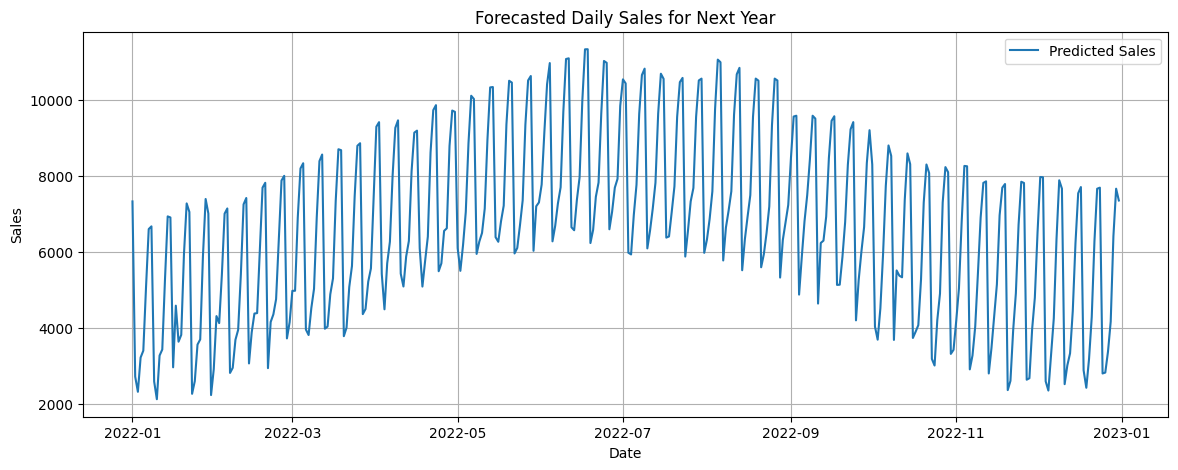

In [57]:
# Forecasting next year (365 days)
future_dates = pd.date_range(start=daily_sales['date'].max() + timedelta(days=1), periods=365)

future_df = pd.DataFrame({'date': future_dates})
future_df['day_of_week'] = future_df['date'].dt.dayofweek
future_df['day_of_month'] = future_df['date'].dt.day
future_df['month'] = future_df['date'].dt.month
future_df['year'] = future_df['date'].dt.year
future_df['quarter'] = future_df['date'].dt.quarter

X_future = future_df[features]
future_df['predicted_sales'] = xgb.predict(X_future)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(future_df['date'], future_df['predicted_sales'], label='Predicted Sales')
plt.title('Forecasted Daily Sales for Next Year')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


# Forecasting using deep learning algorithms:

In [58]:
pip install tensorflow scikit-learn


#Use sales amount for predictions instead of item count

In [59]:
merged_df['sales'] = merged_df['item_count'] * merged_df['price']


# Build an LSTM Model for Predictions
## 1. Prepare Time Series

In [60]:
sales_series = merged_df.groupby('date')['sales'].sum().sort_index()


## 2. Generate synthetic (simulated) data for last 12 months

In [61]:
# Use the last 12 months of data
last_12_months = sales_series[sales_series.index >= sales_series.index.max() - pd.DateOffset(months=12)]


## Normalize the values:

In [62]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
scaled_sales = scaler.fit_transform(last_12_months.values.reshape(-1, 1))

## Create Train/Test Data for LSTM

In [63]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

n_steps = 30  # use last 30 days to predict the next day
X, y = create_sequences(scaled_sales, n_steps)

# Train/test split
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape for LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


## 4. Build and Train LSTM Model

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=(n_steps, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.2798
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0922
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0501
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0413
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0354
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0382
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0375
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0375
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0365
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0396
Epoch 13/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0387
Epoch 14/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0367
Epoch 15/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0376
Epoch 16/20
9/9 ━━━━━━━━━━━━━━━━━━

## 5. Predict on Test Set

In [65]:
y_pred = model.predict(X_test)

# Inverse transform to get actual sales
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step


## c. Calculate MAPE and Evaluate

In [66]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test_actual, y_pred_actual)
print(f"MAPE: {mape:.2f}%")


MAPE: 54.63%


#Forecast the Next 3 Months Using Full Series
## 1. Train on Full 12-Month Series

In [67]:
X_full, y_full = create_sequences(scaled_sales, n_steps)
X_full = X_full.reshape((X_full.shape[0], X_full.shape[1], 1))

model.fit(X_full, y_full, epochs=20, verbose=1)


Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0395
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0426
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0388
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0389
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0411
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0398
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0393
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0424
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0380
Epoch 10/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0406
Epoch 11/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0391
Epoch 12/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0404
Epoch 13/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0375
Epoch 14/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0396
Epoch 15/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0413
Epoc

##2. Forecast Next 90 Days (Recursive prediction)

In [68]:
forecast = []
input_seq = scaled_sales[-n_steps:]

for _ in range(90):  # 3 months
    input_reshaped = input_seq.reshape((1, n_steps, 1))
    next_pred = model.predict(input_reshaped)[0, 0]
    forecast.append(next_pred)
    input_seq = np.append(input_seq[1:], next_pred)

# Inverse transform predictions
forecast_actual = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━

##3. Plot Forecast

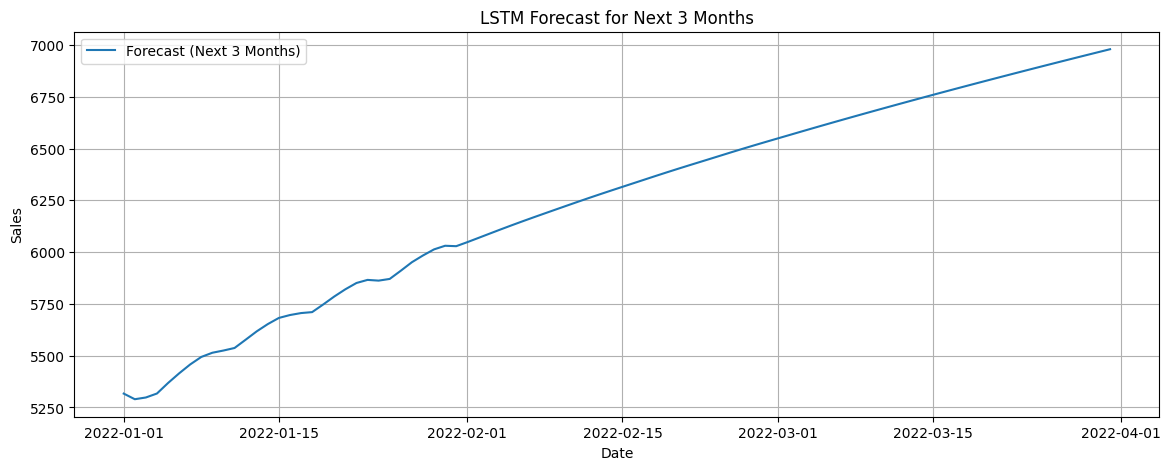

In [69]:
import matplotlib.pyplot as plt
future_dates = pd.date_range(start=sales_series.index.max() + pd.Timedelta(days=1), periods=90)

plt.figure(figsize=(14, 5))
plt.plot(future_dates, forecast_actual, label='Forecast (Next 3 Months)')
plt.title('LSTM Forecast for Next 3 Months')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()
